In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('..\..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')
    
data_Numeric_changed =data_Numeric.dropna()

price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])

useless = ["zipcode","latitude","longitude",'weekly_price','monthly_price']
data_Numeric_changed=data_Numeric_changed.drop(axis=1,columns=useless)

data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,2,1.0,1.0,1.0,99.0,500.0,150.0,1,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,4,1.0,2.0,3.0,245.0,300.0,95.0,1,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,4,3.0,3.0,2.0,175.0,200.0,80.0,1,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [4]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.25)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (532, 25) (532, 1) (532, 1)
Test Set  : (178, 25) (178, 1) (178, 1)


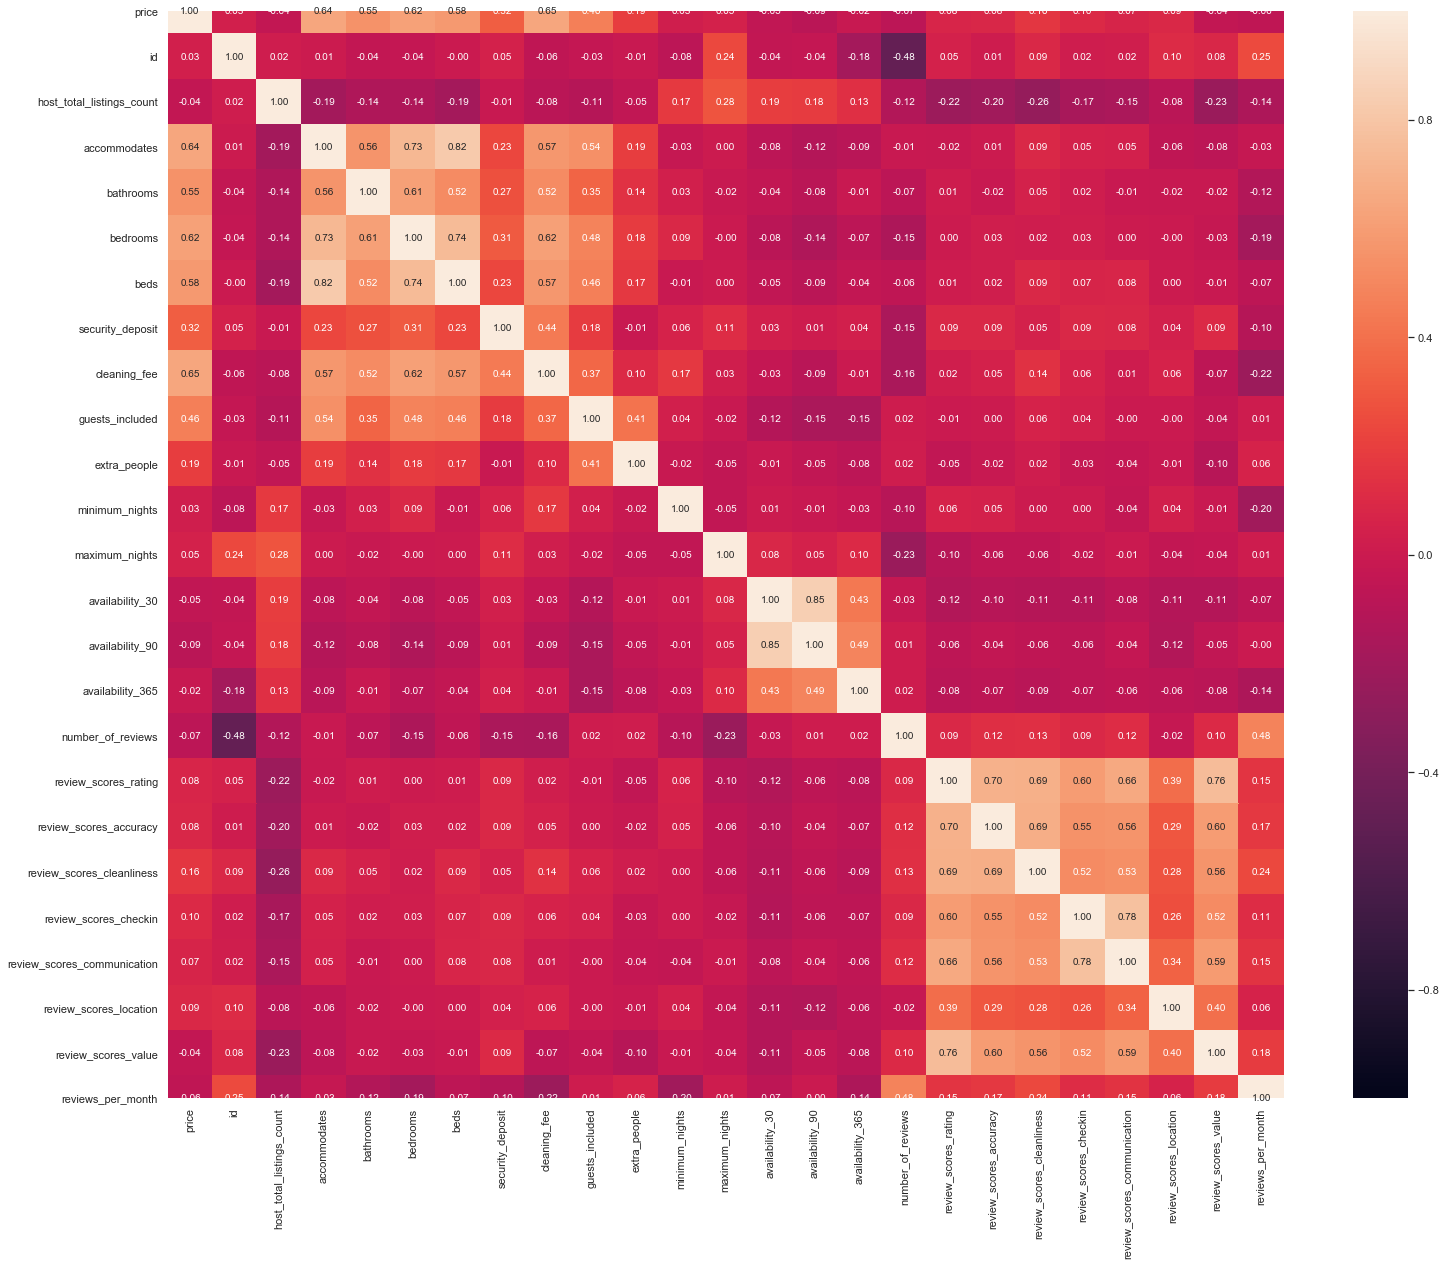

In [5]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [12]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1
    
index = 0
Multi_High_Related_Train = {} 
Multi_High_Related_Test = {}

for var in highrelation:
    Multi_High_Related_Train[index]={}  
    Multi_High_Related_Test[index]={} 
    index+=1

index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train:
        Multi_High_Related_Train[index][index2]={}
        Multi_High_Related_Test[index][index2]={}
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0

for var in highrelation:
    for var2 in highrelation:
            for var3 in highrelation:
                    Multi_High_Related_Train[index][index2][index3] = {}
                    Multi_High_Related_Test[index][index2][index3] = {}
                    index3+=1
            index2+=1
            index3=0
    index+=1
    index2=0


index = 0
index2 = 0
index3 = 0
index4 = 0

for var in highrelation:
    for var2 in highrelation:
        for var3 in highrelation:
                for var4 in highrelation:
                        Multi_High_Related_Train[index][index2][index3][index4] = {}
                        Multi_High_Related_Test[index][index2][index3][index4] = {}
                        index4+=1
                index4=0
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1


index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in highrelation:
    for var2 in highrelation:
        if(var2!=var):
            for var3 in highrelation:
                if(var3 != var2 and var3 != var):
                    for var4 in highrelation:
                        if(var4!=var3 and var4 != var2 and var4 != var):
                            for var5 in highrelation:
                                if(var5!=var4 and var5!=var3 and var5!=var2 and var5!=var):
                                    Multi_High_Related_Train[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_Train[[var,var2,var3,var4,var5]])
                                    Multi_High_Related_Test[index][index2][index3][index4][index5] = pd.DataFrame(data_Numeric_test[[var,var2,var3,var4,var5]])
                                    index5+=1
                            index5=0
                            index4+=1
                    index4=0
                    index3+=1
            index3=0
            index2+=1
    index2=0
    index+=1
    

Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: security_deposit
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included


In [13]:
from sklearn.linear_model import LinearRegression

index = 0
linreg = {}

for var in Multi_High_Related_Train:
        linreg[index]={} 
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
            linreg[index][index2]={}
            index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
                linreg[index][index2][index3]={}
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            for var4 in Multi_High_Related_Train[var][var2][var3]:
                linreg[index][index2][index3][index4] = {}
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            for var4 in Multi_High_Related_Train[var][var2][var3]:
                for var5 in Multi_High_Related_Train[var][var2][var3][var4]:
                    linreg[index][index2][index3][index4][index5] = LinearRegression()
                    linreg[index][index2][index3][index4][index5].fit(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train)
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1                
    index2=0
    index+=1

In [14]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    if(index < len(linreg)):
        price_train_pred[index]={} 
        price_test_pred[index]={} 
        index+=1

index = 0
index2 = 0
for var in linreg:
    for var2 in linreg[var]:
        price_train_pred[index][index2] = {}
        price_test_pred[index][index2] = {}
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in linreg:
    for var2 in linreg[var]:
        for var2 in linreg[var][var2]:
            price_train_pred[index][index2][index3] = {}
            price_test_pred[index][index2][index3] = {}
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                    price_train_pred[index][index2][index3][index4] = {}
                    price_test_pred[index][index2][index3][index4]={}
                    index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

for var in linreg:
    for var2 in linreg[var]:
        for var3 in linreg[var][var2]:
            for var4 in linreg[var][var2][var3]:
                for var5 in linreg[var][var2][var3][var4]:
                    price_train_pred[index][index2][index3][index4][index5] = linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Train[index][index2][index3][index4][index5])
                    price_test_pred[index][index2][index3][index4][index5]=linreg[index][index2][index3][index4][index5].predict(Multi_High_Related_Test[index][index2][index3][index4][index5])
                    index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

In [15]:
index = 0
index2 = 0
index3 = 0
index4 = 0
index5 = 0

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    for var2 in price_train_pred[var]:
        for var3 in price_train_pred[var][var2]:
            for var4 in price_train_pred[var][var2][var3]:
                for var5 in price_train_pred[var][var2][var3][var4]:
                    if(linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train)>0.5):
                        print("For [",var,"][",var2,"][",var3,"][",var4,"][",var5,"]")
                        print(Multi_High_Related_Train[index][index2][index3][index4][index5].columns)
                        print("Train Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Train[index][index2][index3][index4][index5], price_Train))
                        print("Test Explained Variance (R^2) \t:", linreg[index][index2][index3][index4][index5].score(Multi_High_Related_Test[index][index2][index3][index4][index5], price_test))
                        print()
                        index5+=1
                index5=0
                index4+=1
            index4=0
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=0

For [ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191305

For [ 0 ][ 0 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 0 ][ 0 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399246
Test Explained Variance (R^2) 	: 0.45574604004160846

For [ 0 ][ 0 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191351

For [ 0 ][ 0 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_

Test Explained Variance (R^2) 	: 0.4911328601061763

For [ 0 ][ 0 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'security_deposit',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.49736459694267887

For [ 0 ][ 0 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 0 ][ 0 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 0 ][ 0 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test 

Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 0 ][ 2 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'security_deposit', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191349

For [ 0 ][ 2 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'security_deposit',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.5146737505649539

For [ 0 ][ 2 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5024636501042796
Test Explained Variance (R^2) 	: 0.49113286010617707

For [ 0 ][ 2 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.4973645969426783

For [ 0 ][ 3 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191354

For [ 0 ][ 3 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895286

For [ 0 ][ 3 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314902

For [ 0 ][ 3 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.503

Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 0 ][ 4 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.554027531304351
Test Explained Variance (R^2) 	: 0.5249996264895274

For [ 0 ][ 4 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 0 ][ 4 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 0 ][ 4 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'beds', 'security_deposit'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.4900422225

For [ 0 ][ 5 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 0 ][ 5 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bathrooms', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.497364596942674

For [ 0 ][ 5 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399245
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 0 ][ 5 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'bathrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314907

For [ 0 ][ 5 ][ 1 ][ 0 ][ 2 ]
In

For [ 1 ][ 0 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'beds', 'security_deposit',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.514673750564945

For [ 1 ][ 0 ][ 1 ][ 1 ][ 2 ]
Index(['accommodates', 'bathrooms', 'beds', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5024636501042796
Test Explained Variance (R^2) 	: 0.49113286010618173

For [ 1 ][ 0 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 1 ][ 0 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'bathrooms', 'beds', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.5146737505649499

For [ 1 ][ 0 ][ 1 ][ 2 ][ 2 ]
Index(

For [ 1 ][ 1 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'beds', 'bathrooms', 'security_deposit'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191367

For [ 1 ][ 1 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'beds', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 1 ][ 1 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'beds', 'bathrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399245
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 1 ][ 1 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'beds', 'security_deposit', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191351

For [ 1 ][ 1 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'beds', 'security_deposi

Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.49004222251793655

For [ 1 ][ 2 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'bedrooms', 'cleaning_fee', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557197

For [ 1 ][ 2 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399245
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 1 ][ 2 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'security_deposit', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.525579316519135

For [ 1 ][ 2 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'security_deposit', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained

Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191354

For [ 1 ][ 3 ][ 2 ][ 1 ][ 1 ]
Index(['accommodates', 'security_deposit', 'beds', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.49004222251793905

For [ 1 ][ 3 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'security_deposit', 'beds', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.514673750564949

For [ 1 ][ 3 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'security_deposit', 'beds', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785312
Test Explained Variance (R^2) 	: 0.49004222251793905

For [ 1 ][ 3 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'security_deposit', 'beds', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.54

Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.514673750564949

For [ 1 ][ 4 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'security_deposit', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785312
Test Explained Variance (R^2) 	: 0.4900422225179393

For [ 1 ][ 4 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100156
Test Explained Variance (R^2) 	: 0.4378600930497492

For [ 1 ][ 4 ][ 2 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 1 ][ 4 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'beds', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Tes

Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 1 ][ 5 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557197

For [ 1 ][ 5 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'beds', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100157
Test Explained Variance (R^2) 	: 0.4378600930497489

For [ 1 ][ 5 ][ 3 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'security_deposit', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314905

For [ 1 ][ 5 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'security_deposit', 'bathrooms',
       'beds'],
      dtype='object')
Train Explained 

Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314907

For [ 2 ][ 0 ][ 2 ][ 3 ][ 1 ]
Index(['accommodates', 'bathrooms', 'security_deposit', 'guests_included',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5024636501042794
Test Explained Variance (R^2) 	: 0.49113286010617296

For [ 2 ][ 0 ][ 2 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'security_deposit', 'guests_included',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.4973645969426791

For [ 2 ][ 0 ][ 3 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 2 ][ 0 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'bedrooms',
       'security_deposit'],
      dtype='object')
Train Explained Va

Test Explained Variance (R^2) 	: 0.5095370190314903

For [ 2 ][ 1 ][ 3 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633606

For [ 2 ][ 1 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'bathrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895289

For [ 2 ][ 1 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521736

For [ 2 ][ 1 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633606

For [ 2 ][ 2 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'bedrooms', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557197

For [ 2 ][ 2 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'security_deposit',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.5146737505649488

For [ 2 ][ 2 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'security_deposit', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785312
Test Explained Variance (R^2) 	: 0.4900422225179395

For [ 2 ][ 2 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100157
Test Explained Variance (R^2) 	: 0.43786009304974927

For [ 2 ][ 2 ][ 3 ][ 3 ][ 0 ]
Index(['a

Test Explained Variance (R^2) 	: 0.49736459694267676

For [ 2 ][ 3 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314901

For [ 2 ][ 3 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'beds',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5024636501042796
Test Explained Variance (R^2) 	: 0.49113286010617757

For [ 2 ][ 3 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.4973645969426771

For [ 2 ][ 3 ][ 4 ][ 3 ][ 1 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'cleaning_fee',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.

For [ 2 ][ 4 ][ 4 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557197

For [ 2 ][ 4 ][ 4 ][ 1 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'bedrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592053
Test Explained Variance (R^2) 	: 0.4664232271760733

For [ 2 ][ 4 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 2 ][ 4 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.44636381415571996

For [ 2 ][ 4 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates

For [ 3 ][ 0 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399246
Test Explained Variance (R^2) 	: 0.45574604004160846

For [ 3 ][ 0 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191351

For [ 3 ][ 0 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895294

For [ 3 ][ 0 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314906

For [ 3 ][ 0 ][ 0 ][ 2 ][ 0 ]
Index(['a

Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191369

For [ 3 ][ 1 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 3 ][ 1 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399246
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 3 ][ 1 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191347

For [ 3 ][ 1 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'security_deposit',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained 

Train Explained Variance (R^2) 	: 0.5007423901399245
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 3 ][ 2 ][ 0 ][ 3 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'guests_included',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5024636501042795
Test Explained Variance (R^2) 	: 0.49113286010617696

For [ 3 ][ 2 ][ 0 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'guests_included', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.4753701015722789

For [ 3 ][ 2 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'security_deposit'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191351

For [ 3 ][ 2 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'beds', 'bedrooms', 'bathrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explai

Test Explained Variance (R^2) 	: 0.5255793165191356

For [ 3 ][ 3 ][ 1 ][ 1 ][ 1 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.4900422225179388

For [ 3 ][ 3 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895286

For [ 3 ][ 3 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.4900422225179387

For [ 3 ][ 3 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592053
Test Explained Variance (R^2) 

Test Explained Variance (R^2) 	: 0.44636381415571996

For [ 3 ][ 4 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'security_deposit',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895258

For [ 3 ][ 4 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.49004222251793855

For [ 3 ][ 4 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592054
Test Explained Variance (R^2) 	: 0.4664232271760754

For [ 3 ][ 4 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explai

For [ 3 ][ 5 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'security_deposit',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314894

For [ 3 ][ 5 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 3 ][ 5 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557198

For [ 3 ][ 5 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592053
Test Explained Variance (R^2) 	: 0.46642322717607254

For [ 3 ][

Test Explained Variance (R^2) 	: 0.475370101572279

For [ 4 ][ 0 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'security_deposit', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878186
Test Explained Variance (R^2) 	: 0.5255793165191349

For [ 4 ][ 0 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'security_deposit', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895178

For [ 4 ][ 0 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'security_deposit', 'bedrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314907

For [ 4 ][ 0 ][ 2 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'security_deposit', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.52557

Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 4 ][ 1 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'security_deposit', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191329

For [ 4 ][ 1 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'security_deposit', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895321

For [ 4 ][ 1 ][ 2 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'security_deposit', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314901

For [ 4 ][ 1 ][ 2 ][ 1 ][ 0 ]
Index(['accommodates', 'bedrooms', 'security_deposit', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255

Test Explained Variance (R^2) 	: 0.5255793165191347

For [ 4 ][ 2 ][ 2 ][ 1 ][ 1 ]
Index(['accommodates', 'beds', 'security_deposit', 'bedrooms', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.4900422225179394

For [ 4 ][ 2 ][ 2 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'security_deposit', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.514673750564949

For [ 4 ][ 2 ][ 2 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'security_deposit', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785312
Test Explained Variance (R^2) 	: 0.49004222251793894

For [ 4 ][ 2 ][ 2 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100156
Test Explained Variance (R^2) 	: 0.4378

Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895276

For [ 4 ][ 3 ][ 3 ][ 0 ][ 1 ]
Index(['accommodates', 'security_deposit', 'cleaning_fee', 'bathrooms',
       'beds'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.514673750564949

For [ 4 ][ 3 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'security_deposit', 'cleaning_fee', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.49736459694267654

For [ 4 ][ 3 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'security_deposit', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895276

For [ 4 ][ 3 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'security_deposit', 'cleaning_fee', 'bedrooms', 'beds'], dtype='object')
Train Explained 

Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.514673750564949

For [ 4 ][ 4 ][ 3 ][ 0 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'security_deposit', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.4973645969426763

For [ 4 ][ 4 ][ 3 ][ 1 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'security_deposit', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895274

For [ 4 ][ 4 ][ 3 ][ 1 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'security_deposit', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785312
Test Explained Variance (R^2) 	: 0.49004222251793905

For [ 4 ][ 4 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'security_deposit', 'bedrooms',
       'guests_included'],
      dtype='object')
Train 

Train Explained Variance (R^2) 	: 0.5418392226100156
Test Explained Variance (R^2) 	: 0.4378600930497485

For [ 4 ][ 5 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'bedrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236942
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 4 ][ 5 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 4 ][ 5 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bathrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.4973645969426761

For [ 4 ][ 5 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'guests_included', 'cleaning_fee', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explaine

For [ 5 ][ 0 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'cleaning_fee', 'guests_included',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981749
Test Explained Variance (R^2) 	: 0.4973645969426737

For [ 5 ][ 0 ][ 4 ][ 0 ][ 0 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'bedrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399246
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 5 ][ 0 ][ 4 ][ 0 ][ 1 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'bedrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314904

For [ 5 ][ 0 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'bedrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 5 ][ 0 

Test Explained Variance (R^2) 	: 0.4900422225179415

For [ 5 ][ 1 ][ 3 ][ 1 ][ 2 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557197

For [ 5 ][ 1 ][ 3 ][ 2 ][ 0 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'security_deposit',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043508
Test Explained Variance (R^2) 	: 0.5249996264895296

For [ 5 ][ 1 ][ 3 ][ 2 ][ 1 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.4900422225179397

For [ 5 ][ 1 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'bedrooms', 'cleaning_fee', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592053
Test Explained Variance (R^2) 	

For [ 5 ][ 2 ][ 3 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100157
Test Explained Variance (R^2) 	: 0.43786009304974927

For [ 5 ][ 2 ][ 3 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'guests_included', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 5 ][ 2 ][ 3 ][ 3 ][ 1 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557198

For [ 5 ][ 2 ][ 3 ][ 3 ][ 2 ]
Index(['accommodates', 'beds', 'cleaning_fee', 'guests_included',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100157
Test Explained Variance (R^2) 	: 0.4378600930497489

For [ 5 ][ 2 ][ 4 ][ 0 ][ 0 ]
Ind

Test Explained Variance (R^2) 	: 0.49113286010617774

For [ 5 ][ 3 ][ 4 ][ 0 ][ 2 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.49736459694267676

For [ 5 ][ 3 ][ 4 ][ 1 ][ 0 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'bedrooms',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314901

For [ 5 ][ 3 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'beds',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5024636501042796
Test Explained Variance (R^2) 	: 0.49113286010617757

For [ 5 ][ 3 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'security_deposit', 'guests_included', 'cleaning_fee',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 

Train Explained Variance (R^2) 	: 0.5508396593592053
Test Explained Variance (R^2) 	: 0.4664232271760733

For [ 5 ][ 4 ][ 4 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 5 ][ 4 ][ 4 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'beds', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.44636381415571996

For [ 5 ][ 4 ][ 4 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'beds',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5418392226100157
Test Explained Variance (R^2) 	: 0.43786009304974904

For [ 5 ][ 4 ][ 4 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'guests_included', 'security_deposit',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R

For [ 6 ][ 0 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399246
Test Explained Variance (R^2) 	: 0.45574604004160846

For [ 6 ][ 0 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191351

For [ 6 ][ 0 ][ 0 ][ 1 ][ 1 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895294

For [ 6 ][ 0 ][ 0 ][ 1 ][ 2 ]
Index(['accommodates', 'bathrooms', 'bedrooms', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314906

For [ 6 ][ 0 ][ 0 ][ 2 ][ 0 ]
Index(['a

For [ 6 ][ 0 ][ 4 ][ 3 ][ 2 ]
Index(['accommodates', 'bathrooms', 'guests_included', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5591787315981751
Test Explained Variance (R^2) 	: 0.49736459694267765

For [ 6 ][ 1 ][ 0 ][ 0 ][ 0 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'security_deposit'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191369

For [ 6 ][ 1 ][ 0 ][ 0 ][ 1 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 6 ][ 1 ][ 0 ][ 0 ][ 2 ]
Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399246
Test Explained Variance (R^2) 	: 0.4557460400416085

For [ 6 ][ 1 ][ 0 ][ 1 ][ 0 ]
Index(['accommodates', 'bedroo

Train Explained Variance (R^2) 	: 0.5024636501042796
Test Explained Variance (R^2) 	: 0.49113286010617707

For [ 6 ][ 2 ][ 0 ][ 2 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'cleaning_fee', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5526707504495441
Test Explained Variance (R^2) 	: 0.5069068274633604

For [ 6 ][ 2 ][ 0 ][ 2 ][ 1 ]
Index(['accommodates', 'beds', 'bathrooms', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.548526912376541
Test Explained Variance (R^2) 	: 0.5146737505649515

For [ 6 ][ 2 ][ 0 ][ 2 ][ 2 ]
Index(['accommodates', 'beds', 'bathrooms', 'cleaning_fee', 'guests_included'], dtype='object')
Train Explained Variance (R^2) 	: 0.5576894352151378
Test Explained Variance (R^2) 	: 0.475370101572279

For [ 6 ][ 2 ][ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'beds', 'bathrooms', 'guests_included', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399245
Test Explained Va

For [ 6 ][ 3 ][ 1 ][ 0 ][ 0 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'bathrooms', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191354

For [ 6 ][ 3 ][ 1 ][ 0 ][ 1 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'bathrooms',
       'cleaning_fee'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895286

For [ 6 ][ 3 ][ 1 ][ 0 ][ 2 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'bathrooms',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5136544246231958
Test Explained Variance (R^2) 	: 0.5095370190314902

For [ 6 ][ 3 ][ 1 ][ 1 ][ 0 ]
Index(['accommodates', 'security_deposit', 'bedrooms', 'beds', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5039553370878185
Test Explained Variance (R^2) 	: 0.5255793165191356

For [ 6 ][ 3 ][ 1 ][ 1 ][ 1 ]
Index(['a

For [ 6 ][ 4 ][ 1 ][ 2 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'security_deposit',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5540275313043509
Test Explained Variance (R^2) 	: 0.5249996264895258

For [ 6 ][ 4 ][ 1 ][ 2 ][ 1 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'security_deposit', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5417296769785314
Test Explained Variance (R^2) 	: 0.49004222251793855

For [ 6 ][ 4 ][ 1 ][ 2 ][ 2 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'security_deposit',
       'guests_included'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592054
Test Explained Variance (R^2) 	: 0.4664232271760754

For [ 6 ][ 4 ][ 1 ][ 3 ][ 0 ]
Index(['accommodates', 'cleaning_fee', 'bedrooms', 'guests_included',
       'bathrooms'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 6 ][ 4

Train Explained Variance (R^2) 	: 0.5618638845236941
Test Explained Variance (R^2) 	: 0.4875663825521733

For [ 6 ][ 5 ][ 1 ][ 3 ][ 1 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee', 'beds'], dtype='object')
Train Explained Variance (R^2) 	: 0.5492450561910633
Test Explained Variance (R^2) 	: 0.4463638141557198

For [ 6 ][ 5 ][ 1 ][ 3 ][ 2 ]
Index(['accommodates', 'guests_included', 'bedrooms', 'cleaning_fee',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 0.5508396593592053
Test Explained Variance (R^2) 	: 0.46642322717607254

For [ 6 ][ 5 ][ 2 ][ 0 ][ 0 ]
Index(['accommodates', 'guests_included', 'beds', 'bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.5007423901399245
Test Explained Variance (R^2) 	: 0.45574604004160846

For [ 6 ][ 5 ][ 2 ][ 0 ][ 1 ]
Index(['accommodates', 'guests_included', 'beds', 'bathrooms',
       'security_deposit'],
      dtype='object')
Train Explained Variance (R^2) 	: 